In [1]:
import numpy as np
import pandas as pd

from os import path
import pickle
import re

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.options.display.float_format = '{:.2f}'.format

### Import Data

For the purposes of this clustering analysis, we will focus solely on the training dataset since may utilize some of the findings and approaches conducted here in our modelling and need to avoid influencing our observations and decisions with the with the test data.

In [3]:
fd = ['..','data','interim']

# Train set
fp = path.join(*fd, 'train.p')
with open(file=fp, mode='rb') as file:
    train = pickle.load(file)

### Clustering by Department 

In [13]:
dept_xtab = pd.crosstab(index=train['user_id'], columns=train['department'])

In [14]:
dept_xtab.unstack().describe()

count   4330389.00
mean          7.49
std          23.79
min           0.00
25%           0.00
50%           1.00
75%           5.00
max        1559.00
dtype: float64

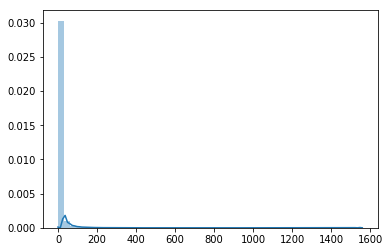

In [16]:
sns.distplot(dept_xtab.unstack())

In [26]:
temp = dept_xtab.applymap(lambda x: 100 if x > 100 else x)

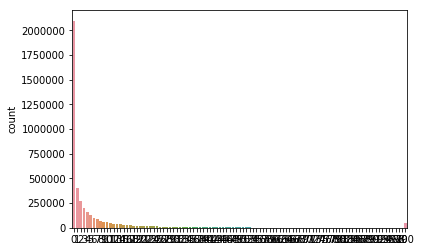

In [28]:
sns.countplot(temp.unstack())

In [19]:
np.log(1 + dept_cross.unstack()).describe()

count   4330389.00
mean          1.03
std           1.27
min           0.00
25%           0.00
50%           0.69
75%           1.79
max           7.35
dtype: float64

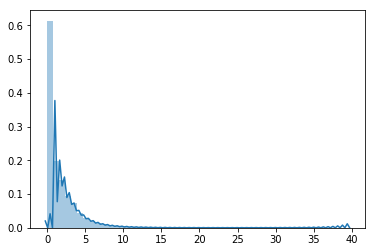

In [31]:
sns.distplot(np.sqrt(dept_xtab.unstack()))

In [42]:
np.log10(50)

1.6989700043360187

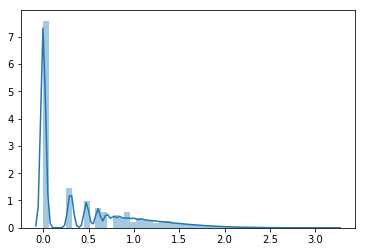

In [39]:
sns.distplot(np.log10(1 + dept_xtab.unstack()))

In [33]:
np.log(1 + dept_xtab.unstack()).describe()

count   4330389.00
mean          1.03
std           1.27
min           0.00
25%           0.00
50%           0.69
75%           1.79
max           7.35
dtype: float64

### Clustering by Aisle

In [ ]:
aisle_cross = pd.crosstab(index=train['user_id'], columns=train['aisle'])

In [22]:
aisle_cross.unstack().describe()

count   27632006.00
mean           1.17
std            5.98
min            0.00
25%            0.00
50%            0.00
75%            0.00
max         1522.00
dtype: float64

### Clustering by Product

In [4]:
user_list = train['user_id'].unique()

In [46]:
train['user_id'].nunique()

206209

In [47]:
train['product_id'].nunique()

49677

In [48]:
train['user_id'].nunique()*train['product_id'].nunique()

10243844493

In [57]:
import random
random.seed(42)
n_users = 50000
user_sample = random.sample(list(user_list), n_users)

In [58]:
sample = train[train['user_id'].isin(user_sample)][['user_id', 'product_id']]

In [54]:
temp = sample.groupby('user_id')['product_id'].value_counts()

In [45]:
temp.shape

(6448427,)

In [45]:
sample['user_id'].nunique()*sample['product_id'].nunique()

4907200000

In [59]:
product_cross = pd.crosstab(index=sample['user_id'], columns=sample['product_id'])

ValueError: negative dimensions are not allowed

In [59]:
train['product_id'].nunique() * train['user_id'].nunique()

10243844493

In [12]:
pd.pivot_table(data=sample, values='order_id',index='user_id',columns='product_id',aggfunc='count')

IndexError: index 612233633 is out of bounds for axis 0 with size 612232704